# Project Notebook

## Social Data Science - exam notebook


#### Authors: 
#### Anton Maach-Møller
#### Christian Nøjgaard Fogdal

## 1. Installations

In [1]:
# pip install geopy
# pip install textblob
# pip install vaderSentiment
# pip install emoji
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# pip install statsmodels
# pip install Wikipedia-API
# pip install chart_studio

## 2. Import of used packages

In [2]:
# basic
import numpy as np
import pandas as pd

#packages to handle API connection
from tqdm import tqdm #progress bar, use code tqdm.pandas()
from time import sleep #module to control speed of extraction

# Twitter
import tweepy as tw # main twitter API package
from tqdm import tqdm #progress bar, use code tqdm.pandas()
from time import sleep #module to control speed of extraction
import time #module to control speed of extraction
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Nominatim - API to access geo data
from geopy.geocoders import Nominatim #Geodata for datacleaning states
from geopy.exc import GeocoderTimedOut #Geodata for datacleaning states
from geopy.extra.rate_limiter import RateLimiter #rate limiter to geopy requests

# packages to handle string elements
import re #regex
from textblob import TextBlob #To analyse sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Sentiment analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import emoji #to "demojize" - translate emojis to text
import nltk #Natural Language Toolkit
import nltk.corpus 
from nltk.corpus import stopwords # list of stopwords to remove
from nltk.stem.porter import PorterStemmer #Stemming and lemmitization
from nltk.stem import WordNetLemmatizer #Stemming and lemmitization

# Machinelearning
from sklearn.model_selection import train_test_split #randomly split dataframe into test and train data
from sklearn.feature_extraction.text import TfidfVectorizer #
from sklearn.linear_model import LogisticRegression
import random #randomizer

# import webbrowser
# import requests
# from bs4 import BeautifulSoup

# plots
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
from chart_studio import plotly as py
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


## 3. Extraction of data from Twitter

#### Definitions

In [3]:

# Unique bearer token - is removed when published, since it is private
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANcAaQEAAAAA84hzZvsLo8rITqxhQJoQHVAd5wI%3DfD5dXkdwihlc4K08dNi3y84D4lVhjiOIREITen9vVe2UVYxFh7"

# authentication using .client
client = tw.Client(bearer_token=MY_BEARER_TOKEN, wait_on_rate_limit=True)

# query to search for tweets
query = "(vaccine OR covidvaccine OR vaccines OR #vaccine OR #vaccines OR #covidvaccine) lang:en -is:retweet place_country:US has:geo"

# start and end time lists for looping
start_list =    ['2020-10-01T00:00:00.000Z',
                 '2020-10-02T00:00:00.000Z',
                 '2020-10-03T00:00:00.000Z',
                 '2020-10-04T00:00:00.000Z',
                 '2020-10-05T00:00:00.000Z',
                 '2020-10-06T00:00:00.000Z',
                 '2020-10-07T00:00:00.000Z',
                 '2020-10-08T00:00:00.000Z',
                 '2020-10-09T00:00:00.000Z',
                 '2020-10-10T00:00:00.000Z',
                 '2020-10-11T00:00:00.000Z',
                 '2020-10-12T00:00:00.000Z',
                 '2020-10-13T00:00:00.000Z',
                 '2020-10-14T00:00:00.000Z',
                 '2020-10-15T00:00:00.000Z',
                 '2020-10-16T00:00:00.000Z',
                 '2020-10-17T00:00:00.000Z',
                 '2020-10-18T00:00:00.000Z',
                 '2020-10-19T00:00:00.000Z',
                 '2020-10-20T00:00:00.000Z',
                 '2020-10-21T00:00:00.000Z',
                 '2020-10-22T00:00:00.000Z',
                 '2020-10-23T00:00:00.000Z',
                 '2020-10-24T00:00:00.000Z',
                 '2020-10-25T00:00:00.000Z',
                 '2020-10-26T00:00:00.000Z',
                 '2020-10-27T00:00:00.000Z',
                 '2020-10-28T00:00:00.000Z',
                 '2020-10-29T00:00:00.000Z',
                 '2020-10-30T00:00:00.000Z',
                 '2020-10-31T00:00:00.000Z',
                 '2020-11-01T00:00:00.000Z',
                 '2020-11-02T00:00:00.000Z',
                 '2020-11-03T00:00:00.000Z',
                 '2020-11-04T00:00:00.000Z',
                 '2020-11-05T00:00:00.000Z',
                 '2020-11-06T00:00:00.000Z',
                 '2020-11-07T00:00:00.000Z',
                 '2020-11-08T00:00:00.000Z',
                 '2020-11-09T00:00:00.000Z',
                 '2020-11-10T00:00:00.000Z',
                 '2020-11-11T00:00:00.000Z',
                 '2020-11-12T00:00:00.000Z',
                 '2020-11-13T00:00:00.000Z',
                 '2020-11-14T00:00:00.000Z',
                 '2020-11-15T00:00:00.000Z',
                 '2020-11-16T00:00:00.000Z',
                 '2020-11-17T00:00:00.000Z',
                 '2020-11-18T00:00:00.000Z',
                 '2020-11-19T00:00:00.000Z',
                 '2020-11-20T00:00:00.000Z',
                 '2020-11-21T00:00:00.000Z',
                 '2020-11-22T00:00:00.000Z',
                 '2020-11-23T00:00:00.000Z',
                 '2020-11-24T00:00:00.000Z',
                 '2020-11-25T00:00:00.000Z',
                 '2020-11-26T00:00:00.000Z',
                 '2020-11-27T00:00:00.000Z',
                 '2020-11-28T00:00:00.000Z',
                 '2020-11-29T00:00:00.000Z',
                 '2020-11-30T00:00:00.000Z'
                ]

end_list =      [
                 '2020-10-01T23:59:59.000Z',
                 '2020-10-02T23:59:59.000Z',
                 '2020-10-03T23:59:59.000Z',
                 '2020-10-04T23:59:59.000Z',
                 '2020-10-05T23:59:59.000Z',
                 '2020-10-06T23:59:59.000Z',
                 '2020-10-07T23:59:59.000Z',
                 '2020-10-08T23:59:59.000Z',
                 '2020-10-09T23:59:59.000Z',
                 '2020-10-10T23:59:59.000Z',
                 '2020-10-11T23:59:59.000Z',
                 '2020-10-12T23:59:59.000Z',
                 '2020-10-13T23:59:59.000Z',
                 '2020-10-14T23:59:59.000Z',
                 '2020-10-15T23:59:59.000Z',
                 '2020-10-16T23:59:59.000Z',
                 '2020-10-17T23:59:59.000Z',
                 '2020-10-18T23:59:59.000Z',
                 '2020-10-19T23:59:59.000Z',
                 '2020-10-20T23:59:59.000Z',
                 '2020-10-21T23:59:59.000Z',
                 '2020-10-22T23:59:59.000Z',
                 '2020-10-23T23:59:59.000Z',
                 '2020-10-24T23:59:59.000Z',
                 '2020-10-25T23:59:59.000Z',
                 '2020-10-26T23:59:59.000Z',
                 '2020-10-27T23:59:59.000Z',
                 '2020-10-28T23:59:59.000Z',
                 '2020-10-29T23:59:59.000Z',
                 '2020-10-30T23:59:59.000Z',
                 '2020-10-31T23:59:59.000Z',
                 '2020-11-01T23:59:59.000Z',
                 '2020-11-02T23:59:59.000Z',
                 '2020-11-03T23:59:59.000Z',
                 '2020-11-04T23:59:59.000Z',
                 '2020-11-05T23:59:59.000Z',
                 '2020-11-06T23:59:59.000Z',
                 '2020-11-07T23:59:59.000Z',
                 '2020-11-08T23:59:59.000Z',
                 '2020-11-09T23:59:59.000Z',
                 '2020-11-10T23:59:59.000Z',
                 '2020-11-11T23:59:59.000Z',
                 '2020-11-12T23:59:59.000Z',
                 '2020-11-13T23:59:59.000Z',
                 '2020-11-14T23:59:59.000Z',
                 '2020-11-15T23:59:59.000Z',
                 '2020-11-16T23:59:59.000Z',
                 '2020-11-17T23:59:59.000Z',
                 '2020-11-18T23:59:59.000Z',
                 '2020-11-19T23:59:59.000Z',
                 '2020-11-20T23:59:59.000Z',
                 '2020-11-21T23:59:59.000Z',
                 '2020-11-22T23:59:59.000Z',
                 '2020-11-23T23:59:59.000Z',
                 '2020-11-24T23:59:59.000Z',
                 '2020-11-25T23:59:59.000Z',
                 '2020-11-26T23:59:59.000Z',
                 '2020-11-27T23:59:59.000Z',
                 '2020-11-28T23:59:59.000Z',
                 '2020-11-29T23:59:59.000Z',
                 '2020-11-30T23:59:59.000Z'
                ]

#max_results = 20

# Total number of tweets we collected from the loop
# total_tweets = 0

# time

#### API call and creation of dataframe

In [4]:
df_out = pd.DataFrame()
tweets_df = pd.DataFrame()
total_tweets = 0

for i in range(0,len(start_list)):
    
    print("-------------------")
    print("local time: ", datetime.now().strftime("%H:%M:%S"))
    print("startlist: ", start_list[i])
    print("       to: ", end_list[i])
    
    count = 0 # Counting tweets per time period
    
    # get tweets from the API
    tweets = client.search_all_tweets(query=query,
                                     start_time=start_list[i],
                                     end_time=end_list[i],
                                     tweet_fields = [
                                                     "created_at", 
                                                     "text", 
                                                     "source", 
                                                    ],
                                  
                                     user_fields = [
                                                    "name", 
                                                    "username", 
                                                    "location", 
                                                    "verified", 
                                                    "description"
                                                   ],
                                  
                                     place_fields=[
                                                   'place_type', 
                                                   'country', 
                                                   'country_code'
                                                  ],
                                  
                                     max_results = 50,
                                     expansions=['author_id', 'geo.place_id']
                                     )
    
    # create a list of records
    tweet_info_ls = []
    # iterate over each tweet and corresponding user details
    for tweet, user, place in zip(tweets.data, tweets.includes['users'], tweets.includes['places']):
        tweet_info = {
            'created_at': tweet.created_at,
            'text': tweet.text,
            'source': tweet.source,
            #'public_metrics': tweet.public_metrics,
            #'organic_metrics': tweet.organic_metrics,
            'name': user.name,
            'username': user.username,
            'user_location': user.location,
            'tweet_location': place.full_name,
            'country_code': place.country_code,
            #'country': user.country,
            'verified': user.verified,
            'description': user.description
        }
        tweet_info_ls.append(tweet_info)
        
    # create dataframe from the extracted records
    df_out = pd.DataFrame(tweet_info_ls)
    
    # looped data is appended to a single dataframe
    tweets_df = tweets_df.append(df_out)
    
    # printing amount of tweets, amount of related user info, amount of related location info
    print(len(tweets.data), "tweets extracted")
    print(len(tweets.includes["users"]), "user related data extracted")
    print(len(tweets.includes['places']), "location related data extracted")
    print("-------------------")
    
    # Request limit time sleeper6
    time.sleep(155)
    
tweets_df = tweets_df.reset_index(drop=True)
tweets_df

-------------------
local time:  01:53:32
startlist:  2020-10-01T00:00:00.000Z
       to:  2020-10-01T23:59:59.000Z
48 tweets extracted
47 user related data extracted
43 location related data extracted
-------------------
-------------------
local time:  01:56:08
startlist:  2020-10-02T00:00:00.000Z
       to:  2020-10-02T23:59:59.000Z
49 tweets extracted
48 user related data extracted
43 location related data extracted
-------------------
-------------------
local time:  01:58:44
startlist:  2020-10-03T00:00:00.000Z
       to:  2020-10-03T23:59:59.000Z
48 tweets extracted
43 user related data extracted
41 location related data extracted
-------------------
-------------------
local time:  02:01:19
startlist:  2020-10-04T00:00:00.000Z
       to:  2020-10-04T23:59:59.000Z
46 tweets extracted
41 user related data extracted
40 location related data extracted
-------------------
-------------------
local time:  02:03:55
startlist:  2020-10-05T00:00:00.000Z
       to:  2020-10-05T23:59:59.0

ConnectionError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /2/tweets/search/all?start_time=2020-11-05T00%3A00%3A00.000Z&end_time=2020-11-05T23%3A59%3A59.000Z&tweet.fields=created_at%2Ctext%2Csource&user.fields=name%2Cusername%2Clocation%2Cverified%2Cdescription&place.fields=place_type%2Ccountry%2Ccountry_code&max_results=50&expansions=author_id%2Cgeo.place_id&query=%28vaccine+OR+covidvaccine+OR+vaccines+OR+%23vaccine+OR+%23vaccines+OR+%23covidvaccine%29+lang%3Aen+-is%3Aretweet+place_country%3AUS+has%3Ageo (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000020C528E5A30>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [5]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description
0,2020-10-01 23:54:28+00:00,Great Article on Pfizer's Covid19 Vaccine! It ...,Twitter for Android,The Catholic Honey Badger ⛪🌄,RuralUSCatholic,"West Plains, MO","Missouri, USA",US,False,In your hearts reverence Christ as Lord. Alway...
1,2020-10-01 23:33:18+00:00,Aight let’s get a vaccine and freaking rage on...,Twitter for iPhone,Berk,ChiBerk96,Chicago and Cincy,"Chicago, IL",US,False,"Die hard sports fan from Chicago, IL. U of Cin..."
2,2020-10-01 23:25:36+00:00,Pfizer CEO Hits Back at the Politicization of ...,Twitter for Android,mark schade aka Spanky Dennison,Mschade2020,"Toledo, OH Rust Belt","Toledo, OH",US,False,liberal minded retiree A gameshow host as prez...
3,2020-10-01 23:24:09+00:00,You take any Vaccine or any meds that #realDon...,Twitter for iPhone,Paul fox,compaulfox,None,"Holly Springs, NC",US,False,
4,2020-10-01 23:07:05+00:00,@GermResolute @PattyMurray Flu doesn’t have th...,Twitter for iPhone,Kevin Wren,wren_kevin,None,"Seattle, WA",US,False,"Equity advocate, #T1D since 2001 #HealthIsAHum..."
...,...,...,...,...,...,...,...,...,...,...
1433,2020-11-04 19:54:00+00:00,“We don’t know when we’ll get our first vaccin...,Twitter for iPhone,@phoenix,phoenix66101281,"Dallas, TX","Paradise, NV",US,False,
1434,2020-11-04 19:44:22+00:00,&amp; be cured &amp; vaccine.\nbut Biden lockd...,Twitter for Android,🏈~SarahD~Football Fan~🏈,sadnky,"Louisville, Kentucky","Queens, NY",US,False,"Family, Louisville Cardinals, Collision Course..."
1435,2020-11-04 19:43:45+00:00,@o_creedo &amp; be cured &amp; vaccine.\nbut B...,Twitter for Android,E,fukitimdown,"Nevada, USA","Commerce City, CO",US,False,I'm not surprised motherfuckers
1436,2020-11-04 19:40:38+00:00,This 67 year young American will take any vacc...,Twitter for iPhone,"EP, MD, MPH",setastarz,None,"Raleigh, NC",US,False,"Life is short, the art long. - Hippocrates"


## 4. Creating dataframe from extracted data

## 5. Cleaning location variable and extracting geo data 

### Clean location data before extracting from Nomatim

In [6]:
def cleaner(document_location):
    """
    Cleaning location variable for:
    mentions (@user), 
    removes "#", 
    removes everything after "/" since some users has multiple locations split by "/", - we take the first location.
    try/except is used since the used method cannot be applied on empty values.
    """
    try:
        document_location = re.sub(r'@[^\s]+','',document_location) #removes @user
        document_location = re.sub(r'#[^\s]+','',document_location) #removes #hashtag
        #document_location = re.sub(r'\/.*$','',document_location) #removes everything after / since some has multiple "homes", - we take the first
        #document_location = re.sub(r'[\d-]','',document_location) #removes digits
        #document_location = re.sub(r'[^\w\s]','', document_location) #Remove non-alphanumeric characters
        return document_location
    except:
        ("Some variable is None")

tweets_df['tweet_location'] = tweets_df['tweet_location'].apply(cleaner)
len(tweets_df)

1438

### Collecting data from Nomatim using GeoPy

In [8]:
geolocator = Nominatim(user_agent="Christian Fogtdal, Student at Copenhagen University, rxw556@alumni.ku.dk")

def city_state_country(row):
    """
    Using Nomatim API to get consistant data of city/state/country from a given country string, 
    - problem was that Twitter users either has "city, state" or "state, country", or something even less usable since location is a free text field.
    
    The code iterates over each row, and extracts city/state/country if applicable.
    Sleep time is set to 1 second. - This is requested by the provider.
    If not applicable the code returns the input.
    """
    coord = f"{row['tweet_location']}"
    sleep(1) #Nomatim is free to use, but requires users to only request 1/second
    location = geolocator.geocode(coord,exactly_one=True, addressdetails=True)
    if not location:
        # if you see many in a row, it's probably Nominatim blocking you.
        # if it's just every once in a while, there were just some bad results. 
        print('Failed with location: ', coord)
        row['city'], row['state'], row['country'] = None, None, None
        return row
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

tweets_df = tweets_df.apply(city_state_country, axis=1)


Failed with location:  Santa Rosa Valley, CA
Failed with location:  URI Engineering Quad
Failed with location:  Medical University of South Carolina (MUSC)
Failed with location:  Chestnut Health Systems
Failed with location:  [Place name removed]


### Final clean of location data

In [9]:
# Removes rows, where country != 'United States'.
# This is often due to free text, where the user for example has written 'my bed' or 'the city'
# I.e. 'the city' returns "City of London", which is why it is removed.
# "None" returns the city None in Piemonte, Italy
tweets_df = tweets_df.drop(tweets_df[tweets_df.country != 'United States'].index)

#Empty values to NaN
tweets_df['city'].replace('', np.nan, inplace=True)
tweets_df['state'].replace('', np.nan, inplace=True)

# Also removes rows without state info
tweets_df[~tweets_df['state'].isnull()]
tweets_df.dropna(subset=['state'], inplace=True)
len(tweets_df)

1427

In [10]:
# Dictionary to get 2 digit state code to use for heatmap later
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [11]:
# Adding 2 digit state codes for map plot 
tweets_df['state_code'] = tweets_df['state'].map(us_state_to_abbrev)
tweets_df.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country,state_code
0,2020-10-01 23:54:28+00:00,Great Article on Pfizer's Covid19 Vaccine! It ...,Twitter for Android,The Catholic Honey Badger ⛪🌄,RuralUSCatholic,"West Plains, MO","Missouri, USA",US,False,In your hearts reverence Christ as Lord. Alway...,NaN,Missouri,United States,MO
1,2020-10-01 23:33:18+00:00,Aight let’s get a vaccine and freaking rage on...,Twitter for iPhone,Berk,ChiBerk96,Chicago and Cincy,"Chicago, IL",US,False,"Die hard sports fan from Chicago, IL. U of Cin...",Chicago,Illinois,United States,IL


In [12]:
# Creating date variable from datetime variable
tweets_df['date'] = pd.to_datetime(tweets_df["created_at"].dt.strftime('%Y-%m-%d'))
tweets_df.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country,state_code,date
0,2020-10-01 23:54:28+00:00,Great Article on Pfizer's Covid19 Vaccine! It ...,Twitter for Android,The Catholic Honey Badger ⛪🌄,RuralUSCatholic,"West Plains, MO","Missouri, USA",US,False,In your hearts reverence Christ as Lord. Alway...,NaN,Missouri,United States,MO,2020-10-01
1,2020-10-01 23:33:18+00:00,Aight let’s get a vaccine and freaking rage on...,Twitter for iPhone,Berk,ChiBerk96,Chicago and Cincy,"Chicago, IL",US,False,"Die hard sports fan from Chicago, IL. U of Cin...",Chicago,Illinois,United States,IL,2020-10-01


save copy as csv

In [56]:
#tweets_df.to_csv(r'pulled_data_1908.csv', index = False)

### Collecting and cleaning data from Wikipedia

In [13]:
#Start by importing the website where we want to extract the data from
dfs = pd.read_html('https://en.wikipedia.org/wiki/2020_United_States_presidential_election')

#seeing that the table we want is the nr19 therefore we extract that
table_stat = dfs[19]

#from the above we see that there are 2 type of headers. We want to deal with this, therefore we put the two columns together 
#by f-string formatting 
table_stat.columns = [f'{i}{j}' for i, j in table_stat.columns]
table_stat.head()

,State ordistrictState ordistrict,Biden/HarrisDemocraticVotes,Biden/HarrisDemocratic%,Biden/HarrisDemocraticEV,Trump/PenceRepublicanVotes,Trump/PenceRepublican%,Trump/PenceRepublicanEV,Jorgensen/CohenLibertarianVotes,Jorgensen/CohenLibertarian%,Jorgensen/CohenLibertarianEV,Hawkins/WalkerGreenVotes,Hawkins/WalkerGreen%,Hawkins/WalkerGreenEV,OthersVotes,Others%,OthersEV,MarginVotes,Margin%,Marginswing[l]%,TotalvotesTotalvotes
0,Alab.,849624,36.57%,–,1441170,62.03%,9,25176,1.08%,–,[m],[m],–,7312,0.31%,–,"−591,546",−25.46%,2.27%,2323282
1,Alaska,153778,42.77%,–,189951,52.83%,3,8897,2.47%,–,[n],[n],–,6904,1.92%,–,"−36,173",−10.06%,4.67%,359530
2,Arizona,1672143,49.36%,11,1661686,49.06%,–,51465,1.52%,–,1557,0.05%,–,475,0.01%,–,10457,0.31%,3.81%,3387326
3,Ark.,423932,34.78%,–,760647,62.40%,6,13133,1.08%,–,2980,0.24%,–,18377,1.51%,–,"−336,715",−27.62%,−0.70%,1219069
4,Calif.,11110250,63.48%,55,6006429,34.32%,–,187895,1.07%,–,81029,0.46%,–,115278,0.66%,–,5103821,29.16%,−0.95%,17500881


In [14]:
#then we drop the columns we are not interested in, since we only want to compare Democrats and Republicans
table_stat1= table_stat.drop(table_stat.columns[[3, 6]], axis=1)
table_stat2 = table_stat1.drop(table_stat1.iloc[:, 5:18], axis=1)

#removing extra rows from Maine and Newbraske due to the election rules in these state
table_stat3= table_stat2.drop(table_stat.index[[20, 21,30, 31, 32, 56, 57]], axis=0)

# Manually handling the states so their are inlibne with the twitter data. Thereby we can merge the data
table_stat4 = table_stat3.replace(['Alab.','Ark.','Calif.', 'Colo.', 'Conn.', 'Del.', 'D.C.' , 'Ky.', 'La.', 'Maine †', 'Md.', 'Mass.', 'Mich.',
                                  'Minn.', 'Miss.', 'Mo.' , 'Mont.', 'Neb. †', 'Nev.[p]', 'N.H.', 'N.J.[q]' , 'N.M.', 'N.Y.[r]', 'N.C.',
                                  'N.D.', 'Okla.', 'Pa.' , 'R.I.', 'S.C.', 'S.D.', 'Tenn.','Texas[t]', 'Vt.' , 'Va.', 'Wash.', 'W.Va.',
                                  'Wis.', 'Wyo.'], 
                                  ['Alabama','Arkansas','California','Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Kentucky',
                                  'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montanna',
                                  'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
                                  'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Vermont',
                                  'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

#renaming columns to give them more intuitive names for comparison 
table_stat5 = table_stat4.rename(columns = {'State ordistrictState ordistrict':'state', 
                                            'Biden/HarrisDemocraticVotes':'Democratic', 
                                            'Biden/HarrisDemocratic%':'Democraticpct', 
                                            'Trump/PenceRepublicanVotes':'Republican', 
                                            'Trump/PenceRepublican%' : 'Republicanpct'}
                                )

table_stat5.head(4)



,state,Democratic,Democraticpct,Republican,Republicanpct
0,Alabama,849624,36.57%,1441170,62.03%
1,Alaska,153778,42.77%,189951,52.83%
2,Arizona,1672143,49.36%,1661686,49.06%
3,Arkansas,423932,34.78%,760647,62.40%


In [15]:
#Comparing the vote pct to see if the state is either Democratic (blue) or Republican (red) and adding a new collum
comparison_column = np.where(table_stat5["Democraticpct"] > table_stat5["Republicanpct"], 'Blue', 'Red')
#comparison_pct_column = np.where(table_stat5["Democraticpct"] > table_stat5["Republicanpct"], table_stat5["Democratic"]-table_stat5["Republican"], 1)


table_stat5["state_color"] = comparison_column
#table_stat5["pct_dif"] = comparison_pct_column

# merging the datasets
tweets_df2 = tweets_df.merge(table_stat5, how='inner', on='state')
tweets_df2.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country,state_code,date,Democratic,Democraticpct,Republican,Republicanpct,state_color
0,2020-10-01 23:54:28+00:00,Great Article on Pfizer's Covid19 Vaccine! It ...,Twitter for Android,The Catholic Honey Badger ⛪🌄,RuralUSCatholic,"West Plains, MO","Missouri, USA",US,False,In your hearts reverence Christ as Lord. Alway...,NaN,Missouri,United States,MO,2020-10-01,1253014,41.41%,1718736,56.80%,Red
1,2020-10-02 22:39:08+00:00,@twoine35 i definitely heard something about h...,Twitter for iPhone,EP53,fiftytres,TX✈️CA,"Warren, MI",US,False,$ | R.I.P JORDAN | R.I.P JAILUN | #JUCOPRODUCT...,NaN,Missouri,United States,MO,2020-10-02,1253014,41.41%,1718736,56.80%,Red


## 6. Cleaning of the tweet text

In [16]:
## Making a copy, to not be forced to load from the start every time
tweets_df3 = tweets_df2.copy()

In [17]:
tweets_df2['text'][69]

'During the swine flue ( obama /Biden ) the vaccines killed and made more people sick . So much for Biden handling the pandemic'

### Cleaner for the text variable

In [18]:
def cleaner_text(document_tweet):
    """
    Cleaning tweet text for:
    replacing \n newlines with white space ' ',
    lower case everything,
    removes mentions (@user), 
    removes "#" before hashtags and keeps the text, 
    removes digits, 
    removes http-links,
    """
    document_tweet = re.sub(r'\r\n|\r|\n', ' ', document_tweet) #replaces newline with with space
    document_tweet = document_tweet.lower() #To lower case
    document_tweet = re.sub(r'@[^\s]+','',document_tweet) #removes @user
    document_tweet = re.sub(r'[#]','',document_tweet) #Removes only #-sign
    document_tweet = re.sub(r'[\d-]','',document_tweet) #removes digits
    document_tweet = re.sub(r'http[^\s]+','',document_tweet) #removes links starting with https
    document_tweet = re.sub(r'[^\w\s]','', document_tweet) #Remove non-alphanumeric characters
    #document_tweet = re.sub(r'#[^\s]+','',document_tweet) #removes "#" and #hashtagstring
    return document_tweet

tweets_df3['text'] = tweets_df3['text'].apply(cleaner_text)

### Translate emojis to text

In [ ]:
def demojize_text(text_tweet):
    """
    translates emojis to text.
    """
    return emoji.demojize(text_tweet, delimiters=("", " "))

tweets_df2['text'] = tweets_df2['text'].apply(demojize_text)

### Removing stop words

doing this before ML

### Apply the sentiment analysis using Vader

In [19]:
# Vader sentiment analysis
def sentiment_analyser(tweet_text):
    """
    Using Vader as sentiment analyser.
    Vader outputs neg, neu, pos and compound, - we only keep compound.
    This is done for each tweet.
    """
    analyser= SentimentIntensityAnalyzer()
    sentiment_score = analyser.polarity_scores(tweet_text)["compound"]
    return sentiment_score

# sentiment score from -1 to 1
tweets_df3['sentiment_score'] = tweets_df3['text'].apply(sentiment_analyser)

# boolean value is 0 if sentiment is negative, else 1
tweets_df3['tweet_sentiment'] = [0 if i < 0 else 1 for i in tweets_df3.sentiment_score]
tweets_df3.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,country,state_code,date,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-10-01 23:54:28+00:00,great article on pfizers covid vaccine it may ...,Twitter for Android,The Catholic Honey Badger ⛪🌄,RuralUSCatholic,"West Plains, MO","Missouri, USA",US,False,In your hearts reverence Christ as Lord. Alway...,...,United States,MO,2020-10-01,1253014,41.41%,1718736,56.80%,Red,0.6249,1
1,2020-10-02 22:39:08+00:00,i definitely heard something about him buyin ...,Twitter for iPhone,EP53,fiftytres,TX✈️CA,"Warren, MI",US,False,$ | R.I.P JORDAN | R.I.P JAILUN | #JUCOPRODUCT...,...,United States,MO,2020-10-02,1253014,41.41%,1718736,56.80%,Red,0.4019,1


In [20]:
df = tweets_df3

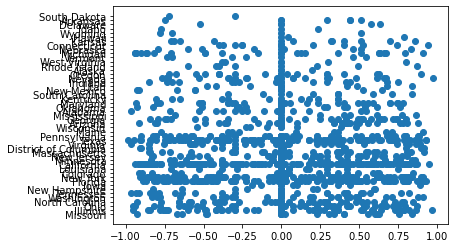

In [21]:
import statsmodels.api as sm
import pandas as pd

# defining the variables
x = df['sentiment_score'].tolist()
y = df['state'].tolist()
plt.scatter(x, y)

max_x = df['sentiment_score'].max()
min_x = df['sentiment_score'].min()

x = np.arange(min_x, max_x, 1)

# adding the constant term
#x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
#result = sm.OLS(y, x).fit()

# printing the summary table
#print(result.summary())

### Heatmap for mean sentiment

In [22]:
tweets_mean = tweets_df3.groupby(['state', 'state_code']) \
       .agg(count=('state', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_mean.head()

,state,state_code,count,mean_sentiment
0,Alabama,AL,18,-0.144456
1,Alaska,AK,3,0.066233
2,Arizona,AZ,38,0.105955
3,Arkansas,AR,7,0.133829
4,California,CA,200,-0.042262


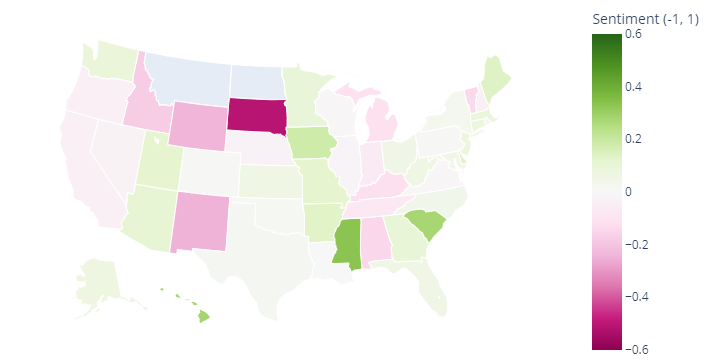

In [57]:
#df_map = tweets_df4

tweets_mean['text'] = tweets_mean['state']

fig = go.Figure(data=go.Choropleth(
    locations=tweets_mean['state_code'], # Spatial coordinates,
    z = tweets_mean['mean_sentiment'].astype(float), # Data to be color-coded
    locationmode='USA-states',
    colorscale='RdBu',
    autocolorscale=True,
    text=tweets_mean['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Sentiment (-1, 1)", 
    zmin=-0.6, # min value for colorbar
    zmax=0.6 # max value for colorbar
))


fig.update_layout(
    #title_text='Sentiment around 2020 US presidential election',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



### Violinplot over average sentiment for each party

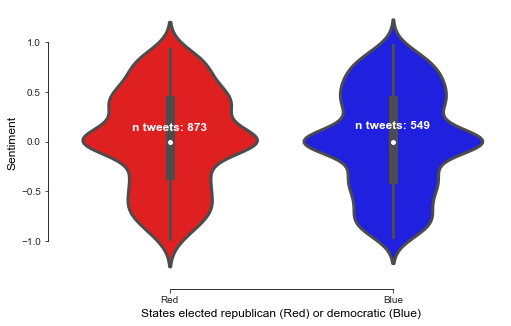

In [29]:
fig = plt.figure(figsize=(8, 5))
my_pal = {"Blue": "b", "Red": "r"}


#sns.set(style="darkgrid") # run this once for dark colored graphs, - dont know why

ax = sns.violinplot(x="state_color", y="sentiment_score", data=tweets_df3, palette=my_pal, linewidth=3)

# Calculate number of obs per group & median to position labels
medians = tweets_df3.groupby(['state_color'])['sentiment_score'].mean().values
nobs = tweets_df3['state_color'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n tweets: " + i for i in nobs]

# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick]+0.1, 
            nobs[tick],
            horizontalalignment='center',
            color='w', # text  color
            fontsize=12,
            weight='semibold'
           )
    
#colors
sns.set_style("white")

sns.despine(offset=10, trim=True); #remove unnecessary axis 
ax.set_xlabel('States elected republican (Red) or democratic (Blue)') # Choose title x-axis
ax.xaxis.label.set_fontsize(12) # Choose font size for x-axis title

ax.set_ylabel('Sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(12) # Choose font size for y-axis title
fig.savefig('violinplot_red_blue.pdf') 

### Boxplot for sentiment for each source of the tweet
OBS: low n for various sources

see count below

In [36]:

tweets_mean_source = tweets_df3.groupby(['source']) \
       .agg(count=('source', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_mean_source

,source,count,mean_sentiment
0,Instagram,11,0.118445
1,Sprout Social,1,-0.381800
2,Squarespace,1,0.964800
3,Tweetbot for iΟS,5,0.125480
4,Twitter for Android,495,0.003303
5,Twitter for iPad,24,-0.173825
6,Twitter for iPhone,885,0.029638


In [38]:
# only take n > 50
tweets_mean_source = tweets_mean_source.loc[tweets_mean_source['count'] > 50]
tweets_mean_source

,source,count,mean_sentiment
4,Twitter for Android,495,0.003303
6,Twitter for iPhone,885,0.029638


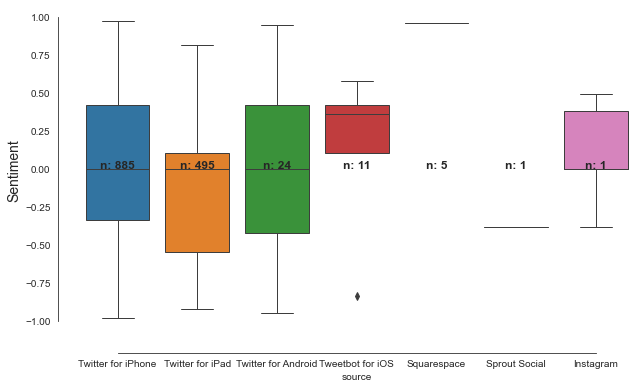

In [41]:
fig = plt.figure(figsize=(10, 6))
sns.set_style("white")
my_order = df.groupby(by=["source"])["sentiment_score"].count().iloc[::-1].index

#my_order = ["Twitter for iPhone", "Twitter for Android", "Twitter for iPad", "Tweetbot for iΟS", "Squarespace"]
ax = sns.boxplot(
                x="source", 
                y="sentiment_score", 
                data=tweets_df3, 
                palette="tab10",
                linewidth=1, 
                order=my_order
                )

# Calculate number of obs per group & median to position labels
means = tweets_df3.groupby(['source'])['sentiment_score'].mean().values
nobs = tweets_df3['source'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            0, 
            nobs[tick],
            horizontalalignment='center',
            fontsize=12,
            #color='w', # text  color
            weight='semibold'
           )

sns.despine(offset=20, trim=True);

ax.set_ylabel('Sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(14) # Choose font size for y-axis title
fig.savefig('Semtiment_source_tweet.pdf') 

# alt spiller hertil

#### sentiment over time for each party

In [42]:
tweets_mean_date = tweets_df3.groupby(['date', 'state_color']) \
       .agg(count=('state', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_mean_date


,date,state_color,count,mean_sentiment
0,2020-10-01,Blue,29,0.018814
1,2020-10-01,Red,14,0.034221
2,2020-10-02,Blue,22,0.016468
3,2020-10-02,Red,20,-0.040390
4,2020-10-03,Blue,24,-0.056904
...,...,...,...,...
65,2020-11-02,Red,15,-0.041860
66,2020-11-03,Blue,21,0.017376
67,2020-11-03,Red,15,0.123967
68,2020-11-04,Blue,25,0.021424


In [43]:
tweets_mean_blue = tweets_mean_date.loc[tweets_mean_date['state_color'] == 'Blue']
tweets_mean_blue = tweets_mean_blue.reset_index(drop=True)

tweets_mean_red = tweets_mean_date.loc[tweets_mean_date['state_color'] == 'Red']
tweets_mean_red = tweets_mean_red.reset_index(drop=True)

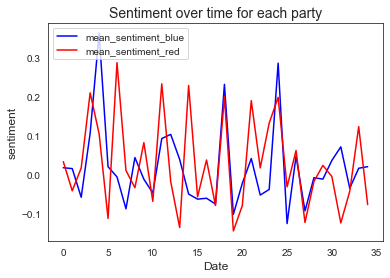

In [44]:
f,ax = plt.subplots()
mean_sentiment_blue = ax.plot(tweets_mean_blue['mean_sentiment'], color = 'blue', label='mean_sentiment_blue') # Choose lineplot
mean_sentiment_red = ax.plot(tweets_mean_red['mean_sentiment'], color = 'red', label='mean_sentiment_red') # Choose lineplot

ax.set_title('Sentiment over time for each party') # Choose title for plot
ax.title.set_fontsize(14) # Choose title font size

ax.set_xlabel('Date') # Choose title x-axis
ax.xaxis.label.set_fontsize(12) # Choose font size for x-axis title

ax.set_ylabel('sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(12) # Choose font size for y-axis title

ax.legend(loc = 'upper left', bbox_to_anchor=(0, 1))


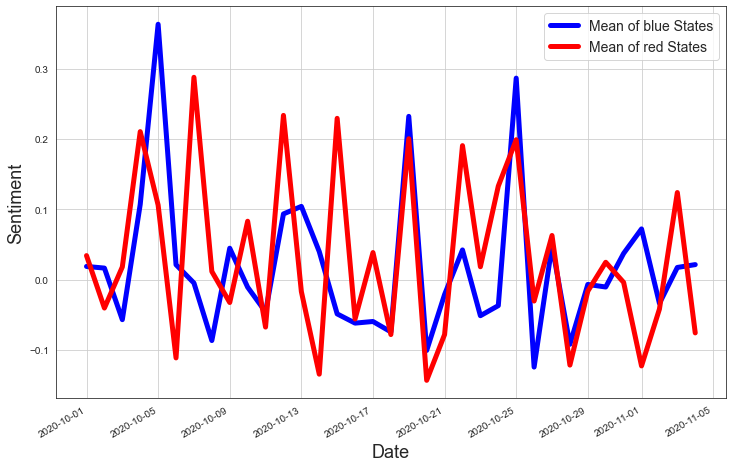

In [45]:
# Plot scatter
fig = plt.figure(figsize=(12, 8))
plt.plot(tweets_mean_blue["date"], tweets_mean_blue["mean_sentiment"], color = 'blue', label='Mean of blue States', linewidth=5)
plt.plot(tweets_mean_red["date"], tweets_mean_red["mean_sentiment"], color = 'red', label='Mean of red States', linewidth=5)

# Labelling 
plt.xlabel("Date", fontsize=18)
plt.ylabel("Sentiment", fontsize=18)

plt.grid(True)

# Auto space
plt.legend(fontsize=14)

# autoformat date
fig.autofmt_xdate()

#plt.annotate('Halloween', (mdates.date2num(x[1]), y[1]), xytext=(15, 15),
#            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

# EVENTUALLY change tick font size
# other type of line?

plt.show()

# Alt godt heril

## Machine learning

### test train split

In [46]:
tweets_df4 = tweets_df3.copy()

In [47]:
def remove_stopwords(tweet_text):
    """
    removes stop words defined by package nltk.corpus
    """
    stop = stopwords.words('english')
    tweet_text = " ".join([word for word in tweet_text.split() if word not in (stop)])
    return tweet_text

tweets_df4['text'] = tweets_df4['text'].apply(remove_stopwords)

In [48]:
# list of tweet sentiments
tweet_sentiments = [0 if i<0 else 1 for i in tweets_df4.sentiment_score]

In [49]:

# splitting dataset into test and train
df_train, df_test = train_test_split(tweets_df4, test_size=.5, random_state=1337)


In [50]:
# Sort the data randomly to mix positive and negative reviews
np.random.seed(0)
df_train = tweets_df4.reindex(np.random.permutation(df_train.index))
df_test = tweets_df4.reindex(np.random.permutation(df_test.index))

# Take out X and Y variable
x_train = df_train['text'].values
x_test = df_test['text'].values
y_train = df_train['tweet_sentiment'].values
y_test = df_test['tweet_sentiment'].values

# Make our bag of words
tfidf = TfidfVectorizer()
x_train_bag = tfidf.fit_transform(x_train)

# Fit the model
lr_text = LogisticRegression(random_state=0) #Text classifier
lr_text.fit(x_train_bag,y_train)

LogisticRegression(random_state=0)

In [51]:
tweets_bag = tfidf.transform(tweets_df4['text'].values)

preds = lr_text.predict(tweets_bag)
print("Testing accuracy =",np.mean([(preds==tweets_df4['tweet_sentiment'])]))

Testing accuracy = 0.7426160337552743


### ML v2

In [52]:
# Make our bag of words
tfidf_tweet = TfidfVectorizer()
tweets_new_bag = tfidf_tweet.fit_transform(tweets_df4['text'].values)

# Fit the model
lr_tweets = LogisticRegression(random_state=0) #Text classifier
lr_tweets.fit(tweets_new_bag, tweet_sentiments)


LogisticRegression(random_state=0)

In [54]:

# Make our bag of words
tweets_features = ['_'.join(s.split()) for s in tfidf_tweet.get_feature_names_out()]
tweets_coefficients = lr_tweets.coef_
tweets_coefs_df = pd.DataFrame.from_records(tweets_coefficients, columns=tweets_features)

# Most important (positive and negative) features:
print()
print(tweets_coefs_df.T.sort_values(by=[0], ascending=False).head(10))
print()
print(tweets_coefs_df.T.sort_values(by=[0], ascending=True).head(10))



                  0
vaccine    1.408770
ready      1.194733
good       1.183615
free       1.008043
effective  0.939846
supposed   0.918240
great      0.906169
pfizer     0.885654
read       0.877657
best       0.873054

                  0
flu       -2.964828
shit      -1.732447
people    -1.707944
stop      -1.553971
die       -1.517696
democrats -1.420526
bad       -1.323268
death     -1.304389
cant      -1.258560
kill      -1.215493


### Tokenization

In [ ]:
#text_tokens = nltk.tokenize.word_tokenize(text)
#text_tokens

### Stemming

In [ ]:
#porter = nltk.PorterStemmer()
#review_stemmed = [porter.stem(i) for i in review_nostop]
#review_stemmed